## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from neural_networks import NeuralNetwork as NN


### Importing dataset

In [2]:
raw_df = pd.read_csv('./Dataset/Dengue.csv')
raw_df.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,...,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,normal
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,...,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,normal
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,...,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,normal
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,...,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,normal
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,...,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,normal


### performing initial checks on dataset

In [3]:
pd.options.display.max_columns=None

In [4]:
raw_df.describe(include='all')

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.0,602.0,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602
mean,300.500000,31.918079,24.588318,27.813181,38.476069,25.613154,31.485111,23.984349,81.254786,13.120862,69.625588,9.034032,0.0,0.0,17.599554,191.498693,1004.690531,59.701192,3.632620,199.802695,17.251785,6.877674,1.827725,0.859734,8502.342193,NaN
std,173.926709,2.737215,2.727919,2.412416,4.776400,4.178797,4.672951,2.668014,9.406354,28.463365,45.539264,14.201016,0.0,0.0,8.980189,81.604668,41.364967,20.832639,1.890352,54.128192,4.676051,1.763928,1.237389,0.973575,6780.749627,NaN
min,0.000000,25.000000,12.740000,18.820000,25.000000,12.360000,18.626667,4.480000,40.833333,0.000000,0.000000,0.000000,0.0,0.0,3.600000,0.500000,0.000000,0.000000,0.800000,57.900000,5.000000,2.000000,0.000000,0.000000,52.000000,NaN
25%,150.250000,30.025000,23.200000,26.500000,35.600000,23.200000,28.100000,23.300000,75.800000,0.000000,0.000000,0.000000,0.0,0.0,11.200000,134.425000,1002.025000,47.400000,2.523780,160.350000,13.900000,6.000000,1.000000,0.000000,3017.750000,NaN
50%,300.500000,31.700000,25.000000,27.900000,38.400000,25.000000,31.500000,24.529268,82.800000,3.000000,100.000000,4.170000,0.0,0.0,15.589178,207.300000,1007.000000,63.700000,3.200000,205.750000,17.750000,7.000000,2.000000,1.000000,7490.000000,NaN
75%,450.750000,33.600000,26.500000,29.448171,41.900000,26.600000,34.875000,25.475000,88.175000,12.589000,100.000000,9.705508,0.0,0.0,22.775000,252.375000,1010.185772,73.200000,4.300000,238.800610,20.600610,8.000000,3.000000,1.000000,12702.500000,NaN


In [5]:
raw_df['cases'].describe()

count      602.000000
mean      8502.342193
std       6780.749627
min         52.000000
25%       3017.750000
50%       7490.000000
75%      12702.500000
max      24983.000000
Name: cases, dtype: float64

In [6]:
#Updating labels column: might be useful in future to test classification problem
raw_df['labels'] = pd.cut(
    raw_df['cases'],
    bins=[-float('inf'), 2500, 5000, 7500, float('inf')],
    labels=[0, 1, 2, 3]
).astype(int)


In [7]:
raw_df.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,44.657534,4.360932,0.0,0.0,15.678356,175.595342,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,1
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,39.837398,2.676748,0.0,0.0,14.574797,158.349593,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,2
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,33.333333,2.337805,0.0,0.0,14.978049,202.621138,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,3
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,37.398374,2.676667,0.0,0.0,16.504878,183.544715,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,3
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,96.747967,15.616992,0.0,0.0,19.546341,224.030081,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,0


### Preparing the input data to neural network

In [8]:
df = raw_df.copy()

In [9]:
df.drop(columns=['serial', 'cases', 'labels', 'stations', 'snow', 'snowdepth'], inplace=True)

In [10]:
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,44.657534,4.360932,15.678356,175.595342,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904
1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,39.837398,2.676748,14.574797,158.349593,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537
2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,33.333333,2.337805,14.978049,202.621138,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569
3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,37.398374,2.676667,16.504878,183.544715,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813
4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,96.747967,15.616992,19.546341,224.030081,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480


In [11]:
raw_df.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,44.657534,4.360932,0.0,0.0,15.678356,175.595342,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,1
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,39.837398,2.676748,0.0,0.0,14.574797,158.349593,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,2
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,33.333333,2.337805,0.0,0.0,14.978049,202.621138,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,3
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,37.398374,2.676667,0.0,0.0,16.504878,183.544715,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,3
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,96.747967,15.616992,0.0,0.0,19.546341,224.030081,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,0


In [12]:
X = np.array(df)
# Y_classification = np.array(pd.get_dummies(raw_df['labels'], dtype=int))
Y_cl = raw_df['labels']



In [13]:
print(X.shape)

print(Y_cl.shape)

(602, 20)
(602,)


#### Spliting dataset into train  dev and test sets

In [14]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y_cl, test_size=0.3, random_state=42)

In [15]:
X_dev_, X_test, Y_dev, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

In [16]:
print(X_train.shape)
print(X_dev_.shape)
print(X_test.shape)


(421, 20)
(90, 20)
(91, 20)


#### Normalizing inputs

In [17]:
X_mean = np.mean(X_train,  axis=0, keepdims=True)
X_dev = np.std(X_train, axis=0, keepdims=True)

In [18]:
X_train = (X_train-X_mean)/X_dev
X_train[:1,:]

array([[-0.3153459 ,  0.52442687, -0.14897567,  0.59901433,  0.11854252,
         0.00627622,  0.89043439,  1.42371925,  1.13709605,  0.67620327,
         0.21132408, -0.33143443, -0.86594917, -0.12238367,  0.8091319 ,
        -0.53908097, -0.55545085, -0.56680802, -0.98836085,  0.18618026]])

In [19]:
X_dev_ = (X_dev_-X_mean)/X_dev
X_dev_[:1,:]

array([[ 0.65997314, -0.18924305,  0.05610572,  0.0723754 , -0.35780477,
        -0.29046312, -0.37378142, -0.59574256, -0.4406535 ,  0.67620327,
         0.77402431, -0.8191061 ,  1.66706419, -0.04326152,  0.57630207,
        -0.83323967,  0.0950825 ,  0.08680913,  0.67140407,  1.8219068 ]])

In [20]:
X_test = (X_test-X_mean)/X_dev
X_test[:1,:]

array([[-0.09027227, -0.26061004, -0.39507334, -0.05401794, -0.40543949,
        -0.5660068 , -0.02261036,  0.3765909 , -0.22478435,  0.67620327,
        -0.07036379, -0.61960405,  0.42484335, -0.00674361, -0.4595531 ,
        -0.83323967,  0.90414919,  0.88801725,  0.67140407,  1.8219068 ]])

#### Transposing the matrices so that each matrix column contains a single training example

In [21]:
X_train = X_train.T
X_development = X_dev_.T
X_test = X_test.T

In [22]:
def one_hot_encode(y, num_classes):
    # Creates an identity matrix and selects the rows based on y values
    return np.eye(num_classes)[y]

In [23]:
pd.Series(Y_train).value_counts()

labels
3    215
0     99
2     60
1     47
Name: count, dtype: int64

In [24]:
Y_train.shape

(421,)

In [25]:
Y_train = one_hot_encode(Y_train,4 ).T
Y_train[:,:5]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.]])

In [26]:
Y_dev = one_hot_encode(Y_dev, 4).T
Y_dev[:, :5]

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1.]])

In [27]:
Y_test = one_hot_encode(Y_test, 4).T
Y_test[:, :5]

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0.]])

In [28]:
X_train.shape

(20, 421)

In [29]:
Y_test.shape

(4, 91)

In [30]:
Y_train.shape

(4, 421)

### Training a model to predict Actual output

In [31]:
class_weights = np.array([[7.2727272727272725],
                          [14.702127659574468],
                          [11.6],
                          [3.308139534883721]])

In [32]:
linear_model = NN(input_size=X_train.shape[0], architecture=[5,5,5,4],activations=['Leaky_ReLU', 'Leaky_ReLU', 'Leaky_ReLU', 'Softmax'] ,loss="CCE", class_weights=class_weights)


In [33]:
def model_train(model, num_epochs=1000, learning_rate=0.1, eval_interval=100,):
    # Training loop
    train_losses = []
    dev_losses = []
    for epoch in range(num_epochs):
        train_loss = model.model_train(X_train, Y_train, learning_rate=learning_rate)
        train_losses.append(train_loss)
        
        # Optionally evaluate on dev set
        if epoch % eval_interval == 0:
            dev_loss, pred = model.evaluate(X_development, Y_dev)
            dev_losses.append(dev_loss)
            print(f"Epoch {epoch}: Train Loss = {train_loss}, Dev Loss = {dev_loss}")

    return train_losses, dev_losses


In [34]:
Y_dev.shape

(4, 90)

In [35]:
train_loss, dev_loss = model_train(model=linear_model, learning_rate=0.5, num_epochs=100000)


Epoch 0: Train Loss = 1209.5741443513416, Dev Loss = 236.74415470605354
Epoch 100: Train Loss = 1025.5394337437224, Dev Loss = 238.72445623300416
Epoch 200: Train Loss = 1006.4596673297707, Dev Loss = 239.178360266447
Epoch 300: Train Loss = 996.4447812045887, Dev Loss = 238.33950110676722
Epoch 400: Train Loss = 989.3747975831689, Dev Loss = 237.35545925002276
Epoch 500: Train Loss = 983.0630451119354, Dev Loss = 236.43786445585516
Epoch 600: Train Loss = 976.1098107105581, Dev Loss = 235.5874979767919
Epoch 700: Train Loss = 971.9009043194364, Dev Loss = 235.12261316195998
Epoch 800: Train Loss = 968.3693843766267, Dev Loss = 234.6606867236808
Epoch 900: Train Loss = 965.2973612105279, Dev Loss = 234.2728289424774
Epoch 1000: Train Loss = 962.2879253521875, Dev Loss = 234.0522928855806
Epoch 1100: Train Loss = 959.3919820850512, Dev Loss = 233.82884783252263
Epoch 1200: Train Loss = 956.5935801396789, Dev Loss = 233.49858492377456
Epoch 1300: Train Loss = 953.7839020125386, Dev Loss 

1000

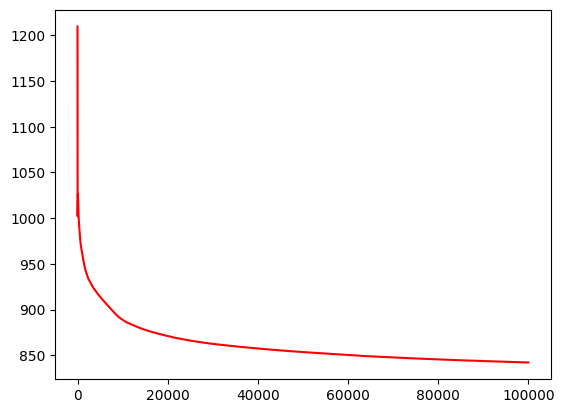

In [36]:

plt.plot(train_loss, c='r')
len(dev_loss)

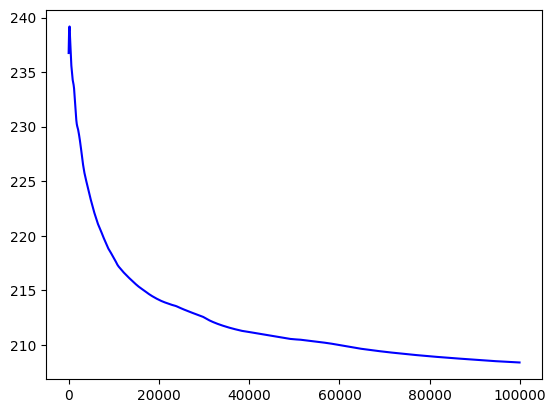

In [37]:
plt.plot(range(1,100001, 100), dev_loss, c='b')


In [38]:
loss, pred = linear_model.evaluate(X_test, Y_test)


In [39]:
raw_df['labels'].value_counts()

labels
3    301
0    144
2     90
1     67
Name: count, dtype: int64

In [40]:
accuracy = np.sum(np.where(np.argmax(Y_test, axis=0, keepdims=True) == np.argmax(pred, axis=0, keepdims=True)))/Y_test.shape[1]
accuracy

np.float64(5.857142857142857)

In [41]:
pred

array([0, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0,
       3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 0, 0, 3, 3, 3, 0, 3,
       3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3])

In [42]:
Y_test.shape

(4, 91)

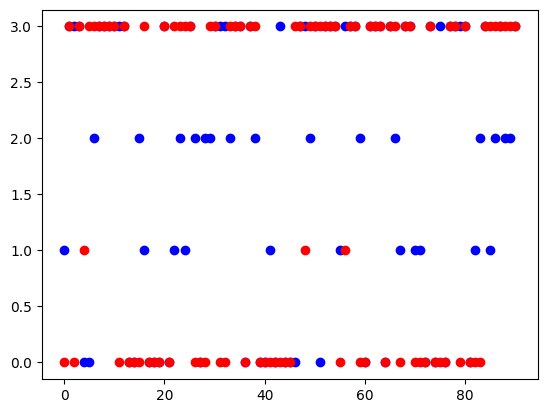

In [43]:
data = np.argmax(Y_test,axis=0, keepdims=True).flatten()
plt.scatter(range(len(data)), data, c="b")  # Scatter plot
plt.scatter(range(len(pred)), pred.flatten(), c='r')

In [44]:
for i in linear_model.grads:
    print(i)
    print(linear_model.grads[i])

dW4
[[ 2.01500069e-02  1.91458806e-04  8.86547974e-04  3.17162432e-05
  -4.37274495e-04]
 [-1.59133460e-02 -9.77941399e-05  2.54206053e-03  9.04091907e-06
   5.24824494e-05]
 [-4.67867252e-03 -9.81008167e-05  3.33286873e-03  4.79200043e-06
   1.20934258e-04]
 [ 4.42011582e-04  4.43615013e-06 -6.76147723e-03 -4.55491627e-05
   2.63857787e-04]]
db4
[[-0.02922867]
 [ 0.00565123]
 [ 0.01172131]
 [ 0.01185614]]
dW3
[[ 2.29314197e-03 -1.26324032e-02 -9.88819063e-03  1.89538053e-03
  -3.96490809e-05]
 [-2.42295328e-05  1.16027149e-04 -8.73259541e-05  4.72413723e-05
   6.47957060e-06]
 [-1.06596413e-03 -7.77669309e-05  3.31225414e-03 -1.90931834e-04
  -1.44039977e-04]
 [ 1.43490038e-04 -4.81776100e-05 -1.63475258e-05 -2.39201201e-06
  -3.12517913e-06]
 [ 7.95734642e-04 -3.90122679e-04  5.13244733e-03 -3.17108250e-04
  -1.46802558e-04]]
db3
[[-9.67909476e-04]
 [-8.99574170e-05]
 [ 3.43727306e-03]
 [ 1.13195623e-04]
 [ 2.84601826e-03]]
dW2
[[-2.03281719e-03  2.19816450e-03  1.38057112e-03 -2.182

In [45]:
for i in linear_model.parameters:
    print(i)
    print(linear_model.parameters[i])

W1
[[-2.01366836e-02 -1.09936795e-01 -2.99575001e-01 -1.40432815e-01
   1.86934713e-02 -3.11750349e-01 -1.05492941e-02 -7.77399083e-04
   4.01648539e-01  3.94341423e-01 -6.81853380e-02 -3.45772276e-01
   1.58065520e-02  5.06210585e-02  1.45445600e-01  1.30192358e-01
   3.18075321e-01  8.69325161e-01 -3.45973980e-01  2.31621752e-02]
 [ 7.84409102e-02 -6.76840467e-03  8.42032488e-04 -6.37388580e-02
   8.17668442e-02 -7.83769233e-02  3.53732276e-01 -2.40349864e-02
   1.95743160e-01  2.74135231e-01 -2.14183994e-01  1.85333877e-01
  -5.44119941e-02  5.64458095e-02 -5.89680528e-01  7.09992402e-02
  -2.02696014e-01  3.12136717e-01 -1.71615868e-01 -6.09946485e-01]
 [-4.61272704e-01 -4.26759273e-01 -7.07766790e-02 -1.53350837e-01
   5.98001797e-02  2.31498063e-01 -2.54636476e-01 -3.88239691e-01
  -3.20450585e-02 -3.65373261e-01 -3.93326392e-01 -2.07423492e-01
   2.64185782e-01  3.25733664e-01 -2.53179757e-01  1.72136360e-01
   3.11980743e-01 -3.67652157e-01  1.25791833e-02  2.91999574e-01]
 [-7